In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.drop(['Person ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [20]:
df['Sleep Disorder'].isna().sum()

np.int64(219)

In [ ]:
df['Sleep Disorder'].fillna('None', inplace=True)

### split boold pressure into systolic and diastolic

In [4]:
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
df.drop(['Blood Pressure'], axis=1, inplace=True)

In [5]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [26]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


<Axes: xlabel='Daily Steps', ylabel='Count'>

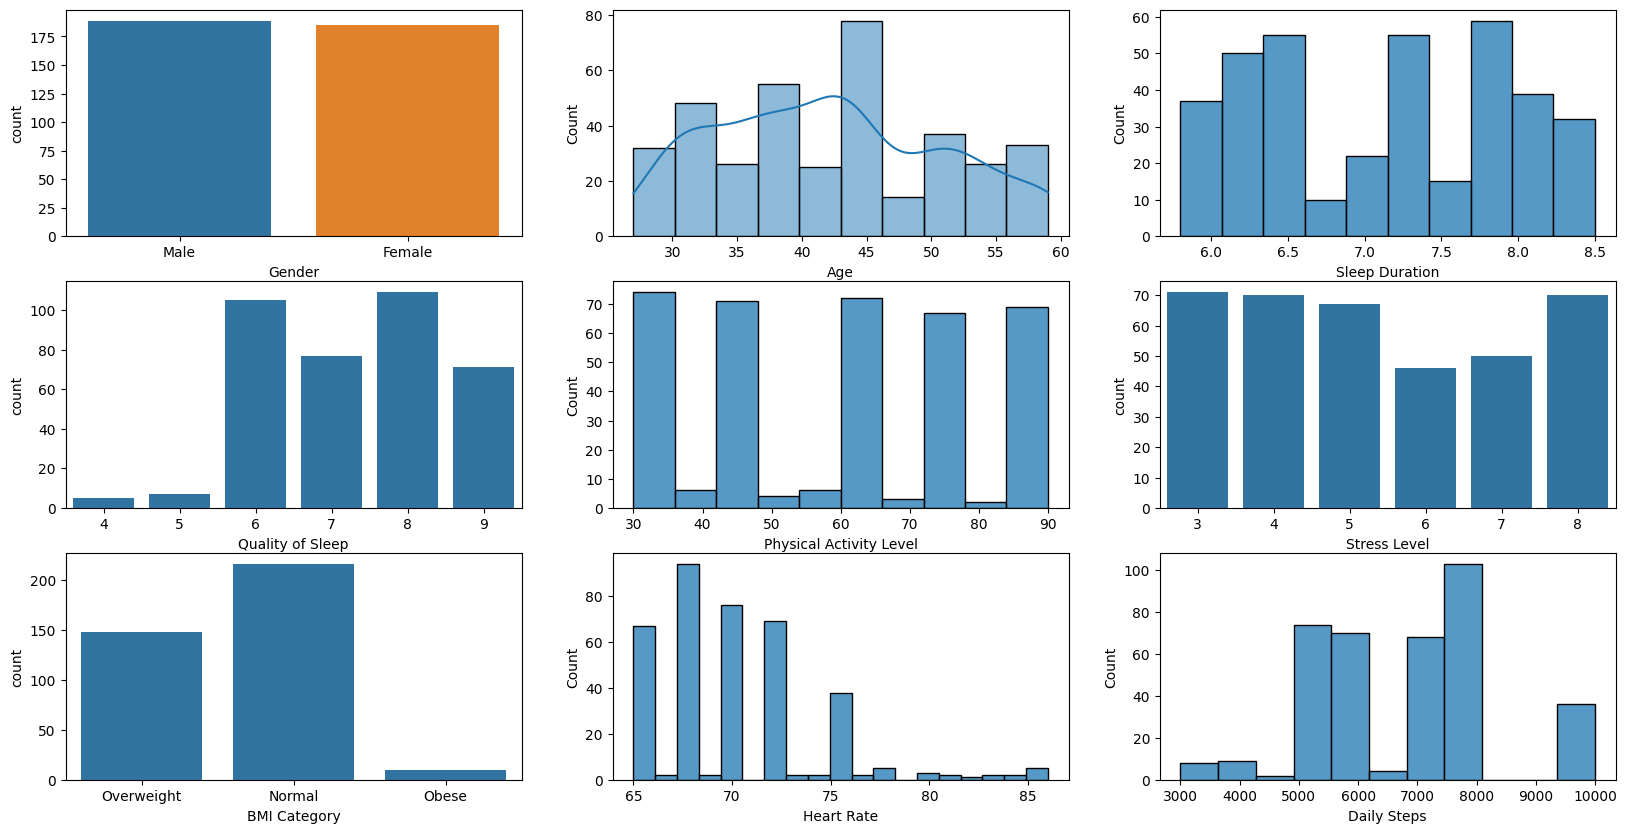

In [32]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))

ax = ax.flatten()

sns.countplot(data=df, x='Gender', ax=ax[0], hue='Gender')
sns.histplot(data=df, x='Age', kde=True, ax=ax[1])
sns.histplot(data=df, x='Sleep Duration', ax=ax[2])
sns.countplot(data=df, x='Quality of Sleep', ax=ax[3])
sns.histplot(data=df, x='Physical Activity Level', ax=ax[4])
sns.countplot(data=df, x='Stress Level', ax=ax[5])
sns.countplot(data=df, x='BMI Category', ax=ax[6])
sns.histplot(data=df, x='Heart Rate', ax=ax[7])
sns.histplot(data=df, x='Daily Steps', ax=ax[8])

Text(0.5, 1.0, 'Gender and sleep Disorder')

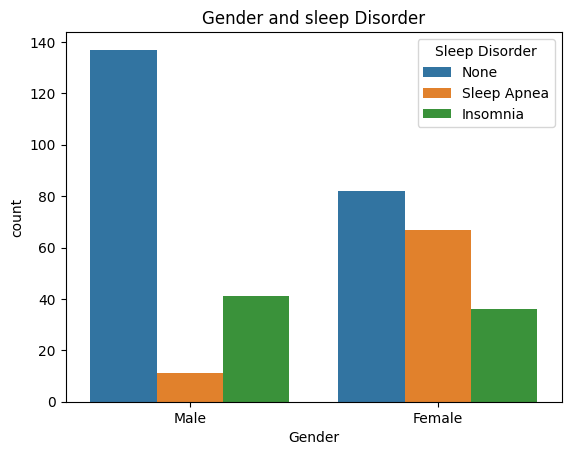

In [6]:
sns.countplot(data=df, x='Gender', hue='Sleep Disorder').set_title('Gender and sleep Disorder')

C:\Users\mahmo\AppData\Local\Temp\ipykernel_10464\2952072423.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

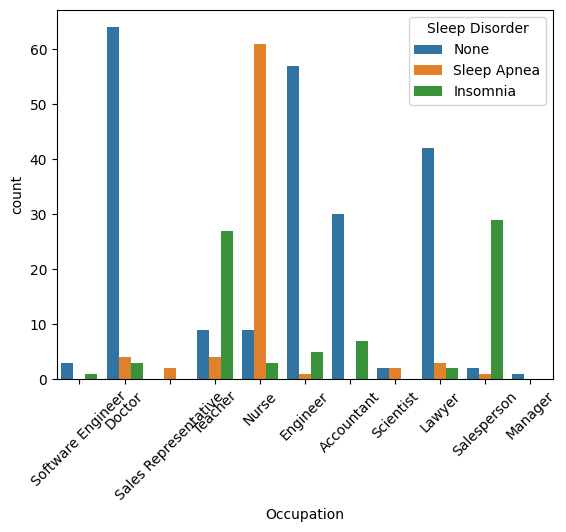

In [8]:
ax = sns.countplot(data=df, x='Occupation', hue='Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Text(0.5, 1.0, 'BMI Category and sleep disorder')

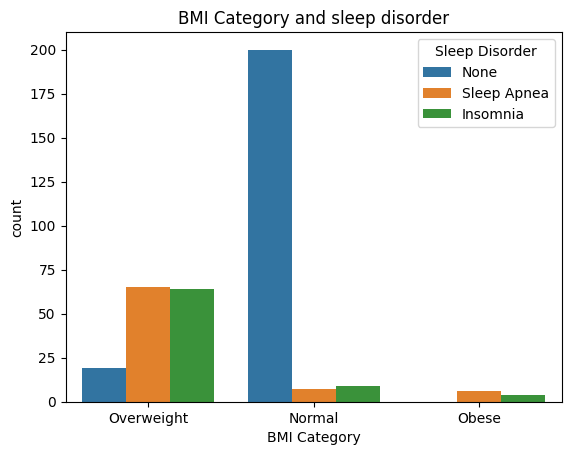

In [9]:
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder').set_title('BMI Category and sleep disorder')

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
cols = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for col in cols:
    encoder.fit(df[col].unique())
    df[col] = encoder.transform(df[col])
    print(col, ':', df[col].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


In [12]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### D Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

In [16]:
dtree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
print(f"Training Accuracy: {dtree.score(x_train, y_train)}")

Training Accuracy: 0.9331103678929766


In [18]:
y_pred = dtree.predict(x_test)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.97        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
print(f'Training Accuracy {rf.score(x_train, y_train)}')

Training Accuracy 0.9331103678929766


In [23]:
y_pred = rf.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



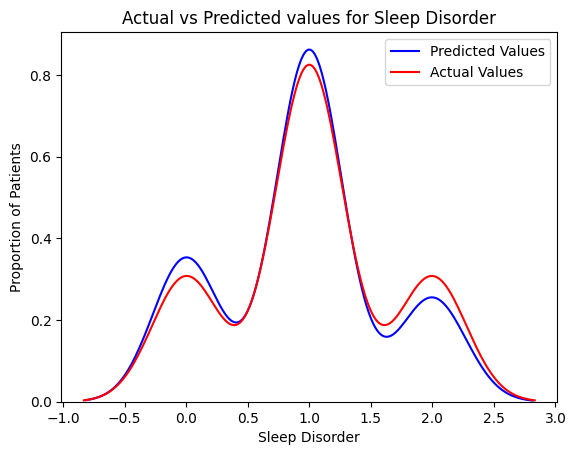

In [30]:
fig, ax = plt.subplots()

sns.kdeplot(y_pred, color='b', label='Predicted Values', ax=ax)
sns.kdeplot(y_test, color='r', label='Actual Values', ax=ax)
ax.set_title('Actual vs Predicted values for Sleep Disorder')
ax.set_xlabel("Sleep Disorder")
ax.set_ylabel('Proportion of Patients')
plt.legend()
plt.show()